### SETUP AND IMPORT

In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('./Data/hcm_aqi_full_dataset.csv')
df.head()

,time,PM10,PM2.5,CO,NO2,O3,SO2,AQI,UV,Temperature,Humidity,Rain,Wind_Speed,Wind_Dir
0,2023-01-01 00:00:00,95.0,65.0,993.0,84.4,25.0,37.5,133,0.0,23.5,65,0.0,11.3,9
1,2023-01-01 01:00:00,86.1,59.0,846.0,70.2,28.0,30.8,133,0.0,23.0,67,0.0,10.3,12
2,2023-01-01 02:00:00,83.4,57.0,821.0,65.8,26.0,28.9,132,0.0,22.5,70,0.0,7.9,360
3,2023-01-01 03:00:00,80.1,54.8,834.0,64.0,22.0,28.5,131,0.0,22.0,73,0.0,8.3,360
4,2023-01-01 04:00:00,69.4,47.5,838.0,60.1,20.0,27.2,129,0.0,21.9,72,0.0,7.9,357


In [104]:
print(df.columns)

Index(['time', 'PM10', 'PM2.5', 'CO', 'NO2', 'O3', 'SO2', 'AQI', 'UV',
       'Temperature', 'Humidity', 'Rain', 'Wind_Speed', 'Wind_Dir'],
      dtype='object')


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26880 entries, 0 to 26879
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         26880 non-null  object 
 1   PM10         26880 non-null  float64
 2   PM2.5        26880 non-null  float64
 3   CO           26880 non-null  float64
 4   NO2          26880 non-null  float64
 5   O3           26880 non-null  float64
 6   SO2          26880 non-null  float64
 7   AQI          26880 non-null  int64  
 8   UV           26880 non-null  float64
 9   Temperature  26880 non-null  float64
 10  Humidity     26880 non-null  int64  
 11  Rain         26880 non-null  float64
 12  Wind_Speed   26880 non-null  float64
 13  Wind_Dir     26880 non-null  int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 2.9+ MB


In [106]:
df.describe()

,PM10,PM2.5,CO,NO2,O3,SO2,AQI,UV,Temperature,Humidity,Rain,Wind_Speed,Wind_Dir
count,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000,26880.000000
mean,33.858899,26.233929,629.266443,31.401306,54.697507,21.708281,81.339174,1.854023,27.645528,78.397098,0.269126,8.057422,182.724182
std,16.195797,13.940568,481.727638,18.181411,42.761007,13.537648,23.948219,2.963247,2.921006,15.366506,1.092745,4.546415,91.757330
min,5.300000,3.600000,100.000000,0.800000,0.000000,0.200000,36.000000,0.000000,18.000000,23.000000,0.000000,0.000000,1.000000
25%,22.100000,16.300000,324.000000,16.900000,20.000000,11.800000,64.000000,0.000000,25.500000,70.000000,0.000000,4.700000,120.000000
50%,30.500000,23.200000,492.000000,28.100000,44.000000,19.000000,78.000000,0.000000,27.000000,82.000000,0.000000,7.300000,171.000000
75%,42.000000,32.600000,757.000000,42.800000,82.000000,28.900000,94.000000,2.800000,29.500000,91.000000,0.100000,10.700000,249.000000
max,136.900000,120.600000,5784.000000,162.500000,272.000000,94.200000,212.000000,14.000000,39.000000,100.000000,22.200000,30.300000,360.000000


# 1. CONVERT TIME COLUMN TO DATETIME

In [107]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek # Monday=0, Sunday=6
df['is_weekend'] = df['dayofweek'].apply(lambda x:1 if x >=5 else 0)
df.head()

,PM10,PM2.5,CO,NO2,O3,SO2,AQI,UV,Temperature,Humidity,Rain,Wind_Speed,Wind_Dir,month,day,hour,dayofweek,is_weekend
time,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,95.0,65.0,993.0,84.4,25.0,37.5,133,0.0,23.5,65,0.0,11.3,9,1,1,0,6,1
2023-01-01 01:00:00,86.1,59.0,846.0,70.2,28.0,30.8,133,0.0,23.0,67,0.0,10.3,12,1,1,1,6,1
2023-01-01 02:00:00,83.4,57.0,821.0,65.8,26.0,28.9,132,0.0,22.5,70,0.0,7.9,360,1,1,2,6,1
2023-01-01 03:00:00,80.1,54.8,834.0,64.0,22.0,28.5,131,0.0,22.0,73,0.0,8.3,360,1,1,3,6,1
2023-01-01 04:00:00,69.4,47.5,838.0,60.1,20.0,27.2,129,0.0,21.9,72,0.0,7.9,357,1,1,4,6,1


# 2. CHECK MISSING VALUES

In [108]:
df.isnull().sum() 

PM10           0
PM2.5          0
CO             0
NO2            0
O3             0
SO2            0
AQI            0
UV             0
Temperature    0
Humidity       0
Rain           0
Wind_Speed     0
Wind_Dir       0
month          0
day            0
hour           0
dayofweek      0
is_weekend     0
dtype: int64

# 3. OUTLIER DETECTION (IQR Method)

In [109]:
numerical_features = ['PM10', 'PM2.5', 'CO', 'NO2', 'O3', 'SO2', 'AQI', 'UV', 'Temperature','Humidity', 'Rain', 'Wind_Speed', 'Wind_Dir']

In [110]:
for column in numerical_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    print(f"{column}: {outlier_count} outliers")

PM10: 828 outliers
PM2.5: 1007 outliers
CO: 1694 outliers
NO2: 297 outliers
O3: 259 outliers
SO2: 690 outliers
AQI: 842 outliers
UV: 2727 outliers
Temperature: 279 outliers
Humidity: 402 outliers
Rain: 3457 outliers
Wind_Speed: 474 outliers
Wind_Dir: 0 outliers


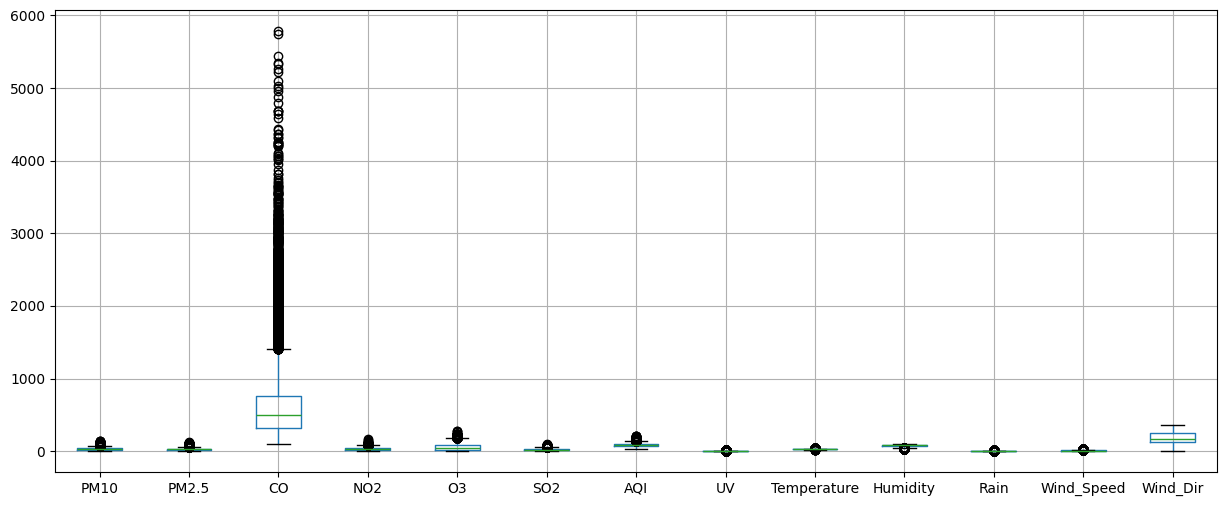

In [111]:
df[numerical_features].boxplot(figsize=(15,6))
plt.show()

In [112]:
# for column in numerical_features:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df[column] = np.clip(df[column], lower_bound, upper_bound)

In [ ]:
# df[numerical_features].boxplot(figsize=(12, 6))
# plt.show()

# 5. Histogram

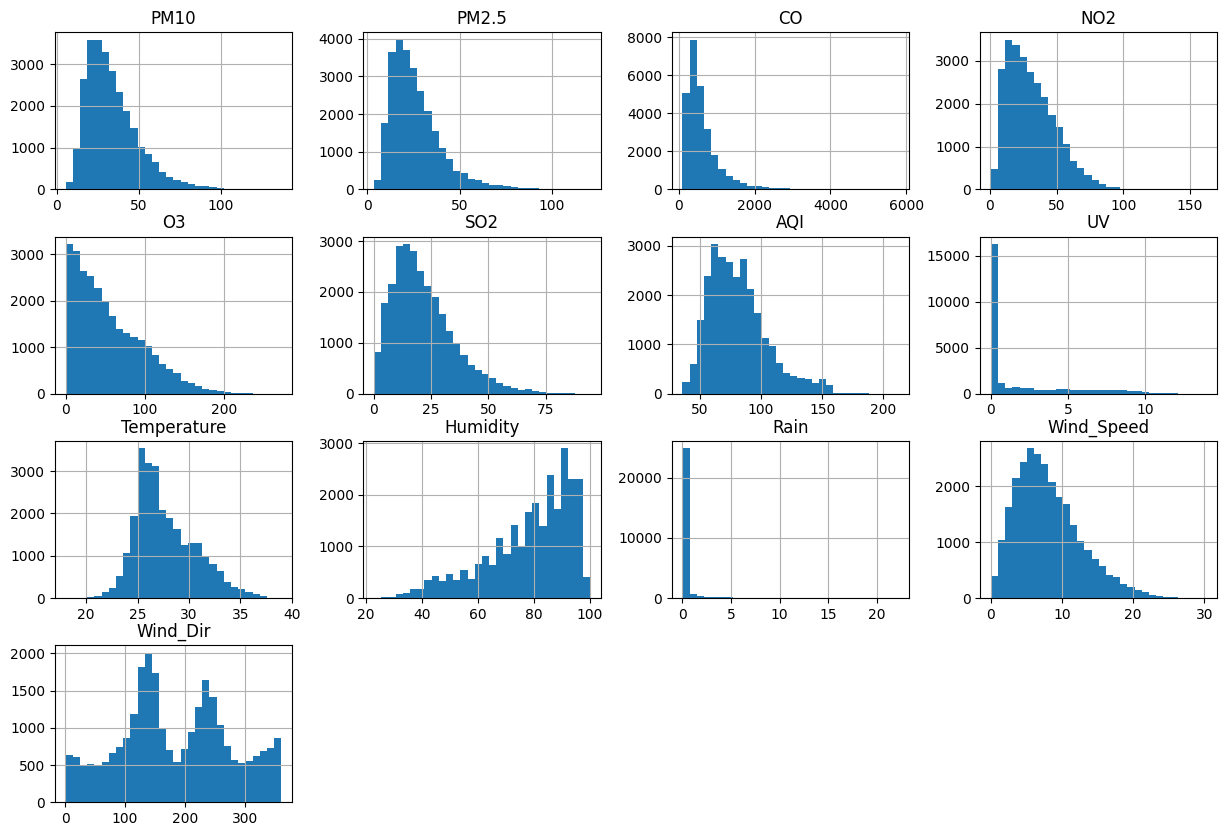

In [114]:
df[numerical_features].hist(bins = 30, figsize=(15,10))
plt.show()

# 6. CORRELATION ANALYSIS

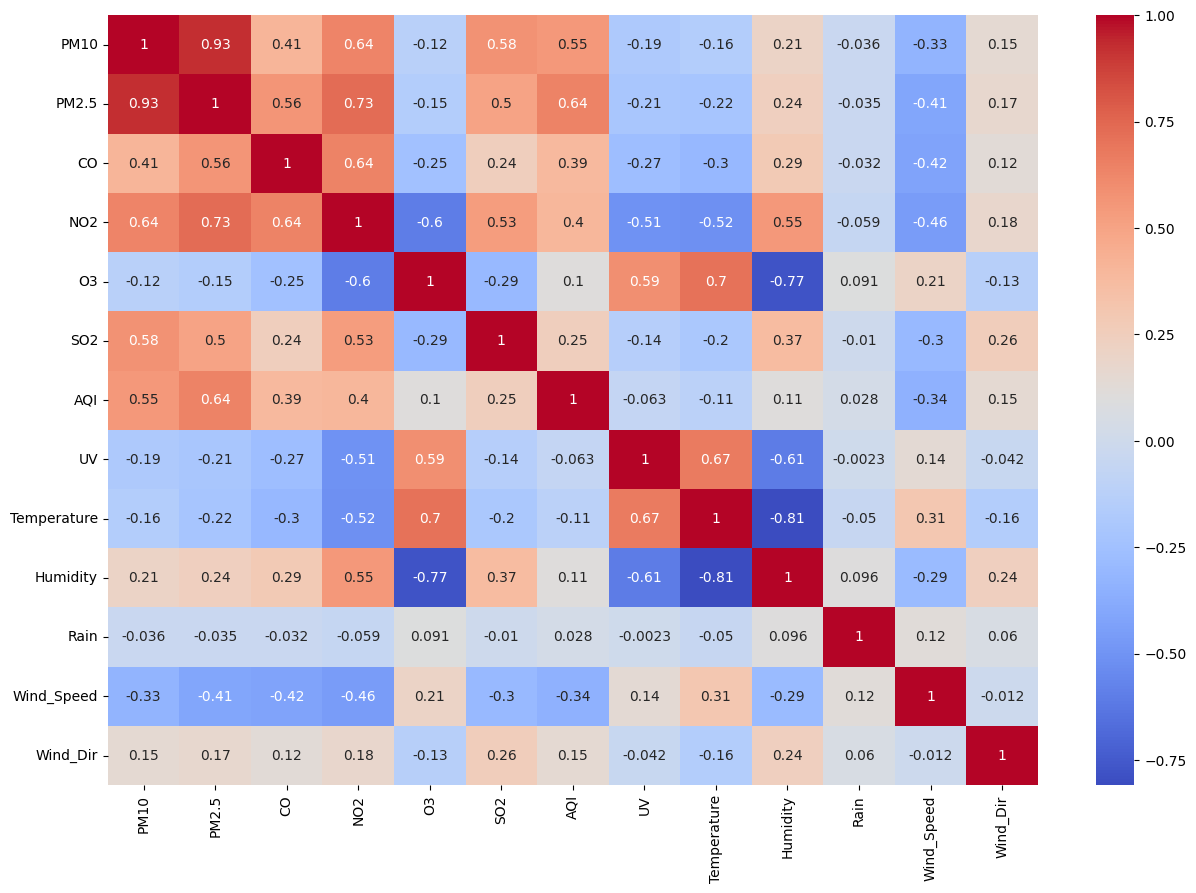

In [115]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [116]:
df.to_csv('./Data/hcm_aqi_dataset_cleaned.csv', index=True)